<a href="https://colab.research.google.com/github/bathamniranjan16/oasis-infobyte-tasks/blob/main/Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
df = pd.read_csv('/content/spam.csv', encoding='latin1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [9]:
df.shape

(5572, 5)

In [10]:
df.size

27860

data cleaning

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [12]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [15]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [16]:
df.sample(4)

,v1,v2
1370,ham,Hope you are feeling great. Pls fill me in. Ab...
4869,ham,Dip's cell dead. So i m coming with him. U bet...
2103,ham,Its a site to simulate the test. It just gives...
3542,ham,I'm e person who's doing e sms survey...


In [19]:
df.rename(columns={'v1':'Target','v2':'Text'}, inplace=True)

In [20]:
df.sample(4)

,Target,Text
2496,ham,HCL chennai requires FRESHERS for voice proces...
1548,ham,"Me, i dont know again oh"
406,ham,All was well until slightly disastrous class t...
1200,ham,Otherwise had part time job na-tuition..


In [21]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

In [22]:
df['Target'] = encoder.fit_transform(df['Target'])

In [23]:
df.head(4)

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...


In [24]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [25]:
df.duplicated().sum()

403

In [27]:
df = df.drop_duplicates(keep='first')

In [28]:
df.duplicated().sum()

0

In [29]:
df.shape

(5169, 2)

EDA

In [30]:
df.head(6)

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...


In [31]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

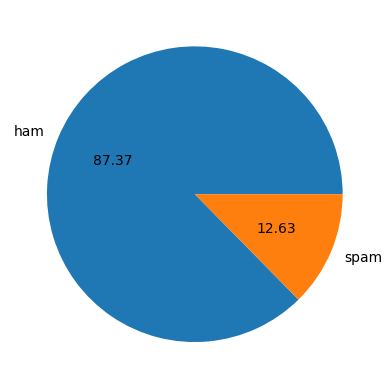

In [32]:
plt.pie(df['Target'].value_counts(), labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [33]:
!pip install nltk

In [35]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [36]:
df['Text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: Text, Length: 5169, dtype: int64

In [37]:
df['num_characters'] = df['Text'].apply(len)

<ipython-input-37-c2765f95e181>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['Text'].apply(len)


In [38]:
df.head(4)

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49


In [39]:
df['Text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Text, Length: 5169, dtype: object

In [40]:
df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: Text, Length: 5169, dtype: int64

In [41]:
df['num_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

<ipython-input-41-60f87f758297>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [42]:
df.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [44]:
df['Text'].apply(lambda x:nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: Text, Length: 5169, dtype: object

In [45]:
df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: Text, Length: 5169, dtype: int64

In [46]:
df['num_sentences'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

<ipython-input-46-e92f349053e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [47]:
df.head(4)

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1


In [48]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [49]:
df[df['Target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [50]:
df[df['Target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


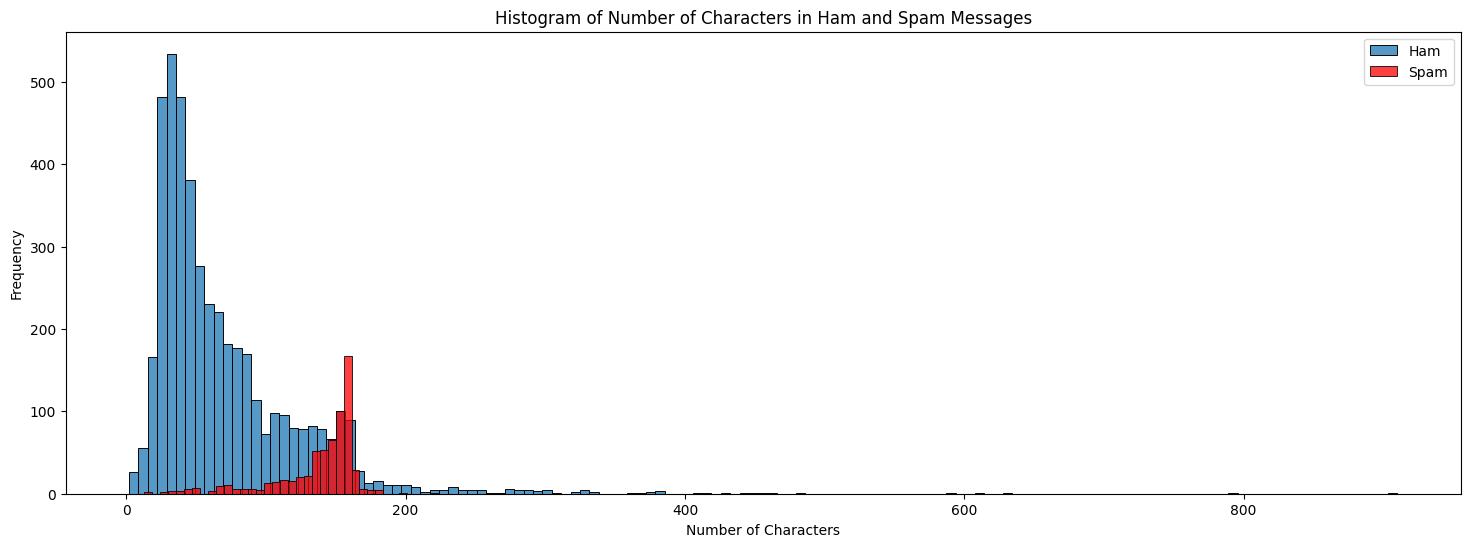

In [53]:
# plot histogram of ham and spam sms/email

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 6))
sns.histplot(df[df['Target'] == 0]['num_characters'], label='Ham', kde=False)
sns.histplot(df[df['Target'] == 1]['num_characters'], color='red', label='Spam', kde=False)
plt.title('Histogram of Number of Characters in Ham and Spam Messages')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.legend()
plt.show()


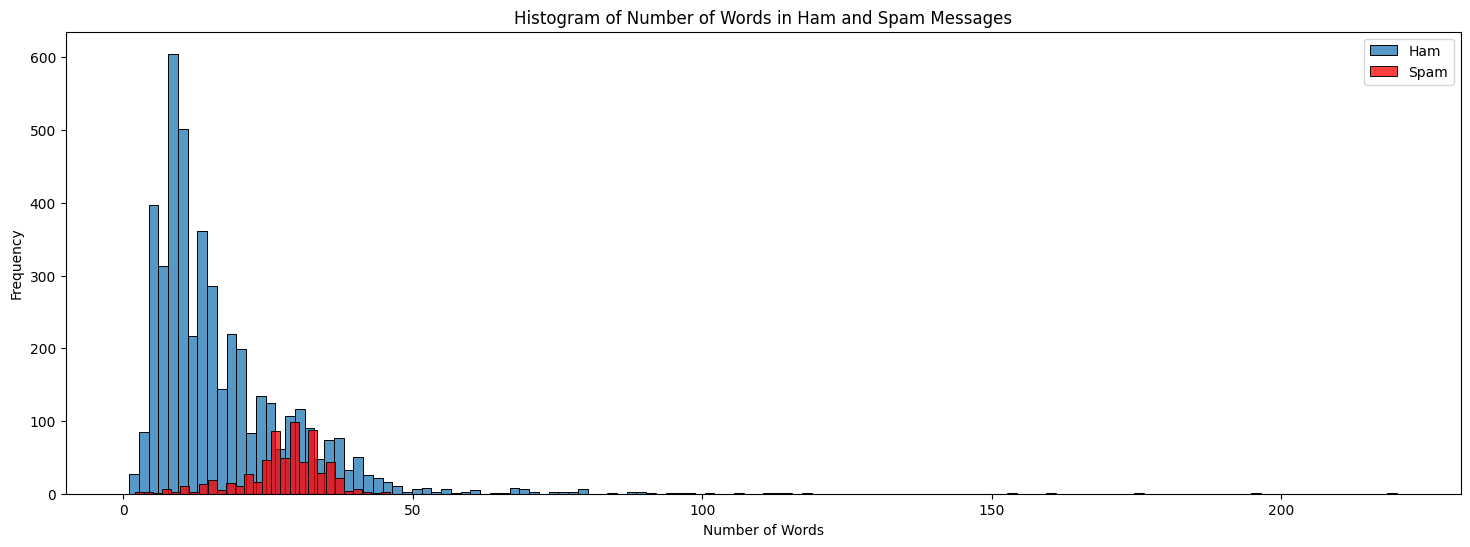

In [54]:
plt.figure(figsize=(18, 6))

sns.histplot(df[df['Target'] == 0]['num_words'], label='Ham', kde=False)
sns.histplot(df[df['Target'] == 1]['num_words'], color='red', label='Spam', kde=False)

plt.title('Histogram of Number of Words in Ham and Spam Messages')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend()
plt.show()


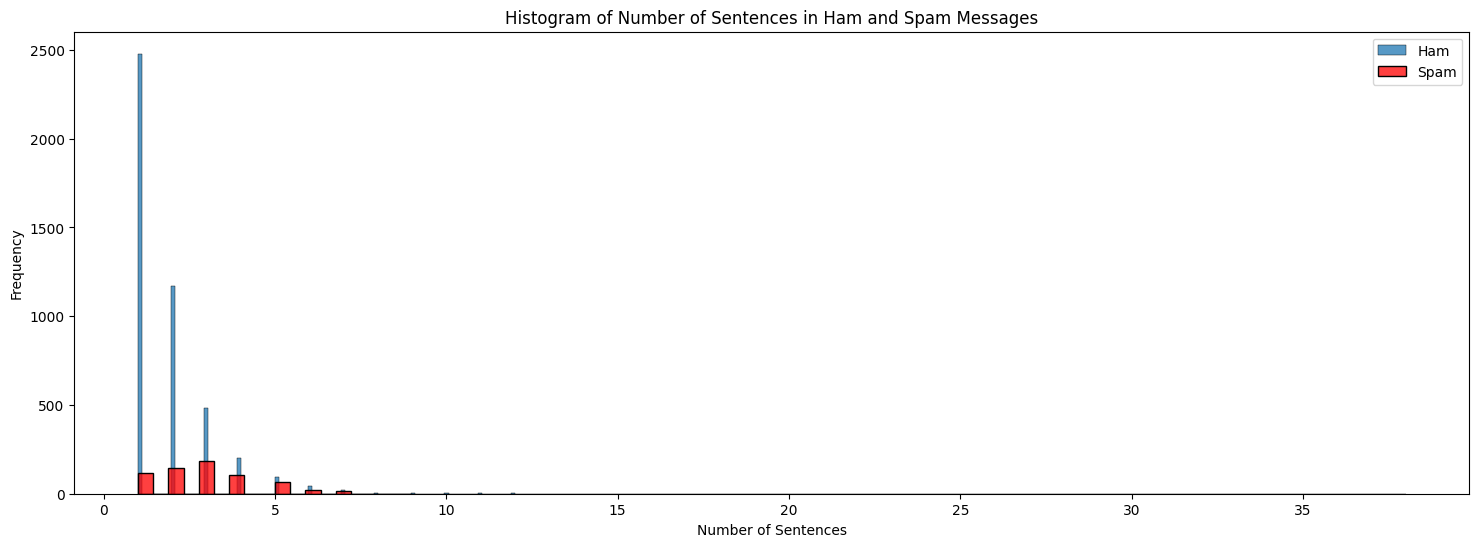

In [55]:
plt.figure(figsize=(18, 6))

sns.histplot(df[df['Target'] == 0]['num_sentences'], label='Ham', kde=False)
sns.histplot(df[df['Target'] == 1]['num_sentences'], color='red', label='Spam', kde=False)

plt.title('Histogram of Number of Sentences in Ham and Spam Messages')
plt.xlabel('Number of Sentences')
plt.ylabel('Frequency')
plt.legend()
plt.show()


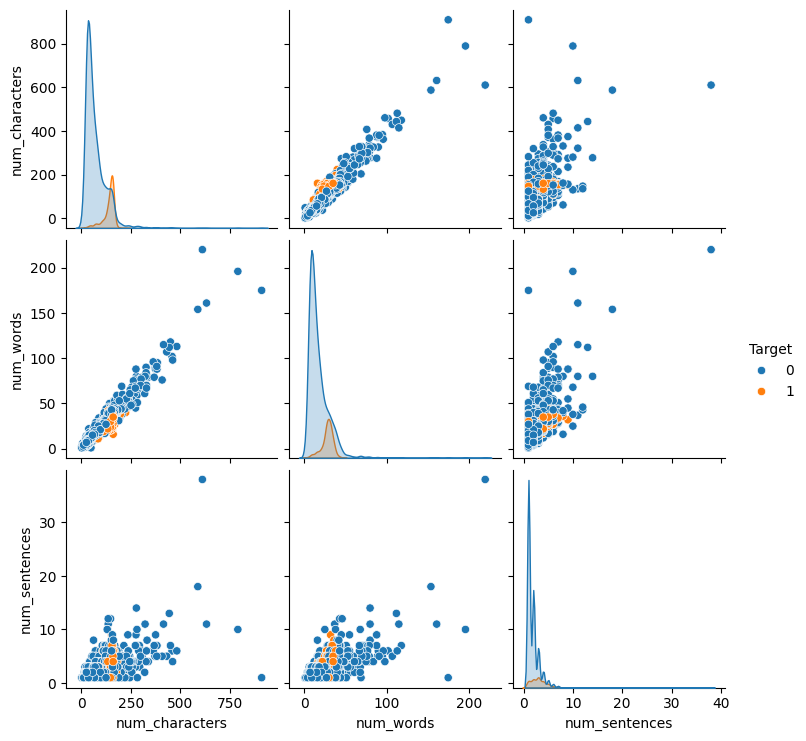

In [56]:
sns.pairplot(df, hue='Target')

data/Text Preprocessing

In [62]:
#I create a function which perform all the above five steps of text processing
#i) Lower
def transform_text1(text1):
  text1 = text1.lower()
  return text1

In [63]:
transform_text1('HI how Are You')

'hi how are you'

In [65]:
#ii) Tokenization

def transform_text2(text2):
  text2 = nltk.word_tokenize(text2)
  return text2

In [67]:
transform_text2('HI how Are You')

['HI', 'how', 'Are', 'You']

In [71]:
#iii) Removing Special Character

def transform_text3(text3):
  y=[]
  for i in text3:
    if i.isalnum():
      y.append(i)
  return y

In [72]:
transform_text3('HI how Are % @ 20 45* You')

['H', 'I', 'h', 'o', 'w', 'A', 'r', 'e', '2', '0', '4', '5', 'Y', 'o', 'u']

In [74]:
def transform_text3a(text3a):
  text3a = text3a.lower()
  text3a = nltk.word_tokenize(text3a)
  y_a=[]
  for i in text3a:
    if i.isalnum():
      y_a.append(i)
  return y_a

In [75]:
transform_text3a('HI how Are @ 20 45* You')

['hi', 'how', 'are', '20', '45', 'you']

In [78]:
#iv) Removing stop words and punctuation

#v) stemming
import nltk

# Download the stopwords corpus
nltk.download('stopwords')

# Import and use the stopwords
from nltk.corpus import stopwords

# Get the list of English stop words
stop_words = stopwords.words('english')

# Print the stop words
print(stop_words)

from nltk.corpus import stopwords
stopwords.words('english')

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [79]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [82]:
def transform_text4(text4):
  text4 = text4.lower()
  text4 = nltk.word_tokenize(text4)
  y_4=[]
  for i in text4:
    if i.isalnum():
      y_4.append(i)
  text4= y_4[:]
  y_4.clear()
  for i in text4:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y_4.append(i)
  return y_4


In [83]:
transform_text4('HI how Are % 20 45* You Mrinal?')

['hi', '20', '45', 'mrinal']

In [84]:
#v) stemming

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [91]:
def transform_text5(text5):
  text5 = text5.lower()
  text5 = nltk.word_tokenize(text5)
  y_5=[]
  for i in text5:
    if i.isalnum():
      y_5.append(i)
  text5=y_5[:]
  y_5.clear()
  for i in text5:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y_5.append(i)
  text5= y_5[:]
  y_5.clear()
  for i in text5:
    y_5.append(ps.stem(i))
  return " ".join(y_5)

#y_5 is a list of strings, you can use the " ".join(y_5) expression to join the elements of
#the list into a single string separated by spaces. the elements of the y_5 List are joined
# together using the (space) separator.

In [92]:
transform_text5('I loved the YT lectures of Machine learning.How about you?')

'love yt lectur machin'

In [93]:
df['Text'][200]

'I sent you  &lt;#&gt;  bucks'

In [94]:
transform_text5('I sent you  &lt;#&gt;  bucks')

'sent lt gt buck'

In [95]:
df['Text'][2000]

"But i'll b going 2 sch on mon. My sis need 2 take smth."

In [96]:
transform_text5('But i ll b going 2 sch on mon. My sis need 2 take smth')

'b go 2 sch mon si need 2 take smth'

In [100]:
def transform_text(text):
  text5 = text.lower()
  text = nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  text=y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text= y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))
  return " ".join(y)

In [101]:
df['Text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                  nah i think goe usf live around though
                              ...                        
5567    thi 2nd time tri 2 contact u pound prize 2 cla...
5568                           will b go esplanad fr home
5569                                 piti mood so suggest
5570    the guy bitch i act like interest buy someth e...
5571                                    rofl it true name
Name: Text, Length: 5169, dtype: object

In [102]:
df['Transformed_Text']=df['Text'].apply(transform_text)

<ipython-input-102-d473165b889f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Transformed_Text']=df['Text'].apply(transform_text)


In [103]:
df.head(4)

,Target,Text,num_characters,num_words,num_sentences,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say


In [104]:
!pip install wordcloud

In [105]:
!pip install --upgrade wordcloud

In [106]:
!pip install pillow

In [107]:
!pip install --upgrade pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 14.2 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.4.0 which is incompatible.


In [113]:
# word cloud --> show/display important word in big size

# now I create word cloud of spam message

from wordcloud import WordCloud

from PIL import Image, ImageDraw, ImageFont

wc = WordCloud (width=800, height=800, min_font_size=10, background_color='white')

In [108]:
df['Target']==1

0       False
1       False
2        True
3       False
4       False
        ...  
5567     True
5568    False
5569    False
5570    False
5571    False
Name: Target, Length: 5169, dtype: bool

In [114]:
df[df['Target']==1]

,Target,Text,num_characters,num_words,num_sentences,Transformed_Text
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back i like fun s...
8,1,WINNER!! As a valued network customer you have...,158,32,5,winner as valu network custom select receivea ...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,had mobil 11 month u r entitl updat latest col...
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",136,31,3,six chanc win cash from 100 pound txt csh11 se...
...,...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,90,18,3,want explicit sex 30 sec ring 02073162414 cost...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,160,38,6,ask 3mobil if 0870 chatlin inclu in free min i...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,160,35,5,had contract mobil 11 mnth latest motorola nok...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,147,30,1,remind from o2 to get pound free call credit d...


In [115]:
df[df['Target']==1]['Transformed_Text']

2       free entri 2 wkli comp win fa cup final tkt 21...
5       freemsg hey darl 3 week word back i like fun s...
8       winner as valu network custom select receivea ...
9       had mobil 11 month u r entitl updat latest col...
11      six chanc win cash from 100 pound txt csh11 se...
                              ...                        
5537    want explicit sex 30 sec ring 02073162414 cost...
5540    ask 3mobil if 0870 chatlin inclu in free min i...
5547    had contract mobil 11 mnth latest motorola nok...
5566    remind from o2 to get pound free call credit d...
5567    thi 2nd time tri 2 contact u pound prize 2 cla...
Name: Transformed_Text, Length: 653, dtype: object

In [116]:
df[df['Target']==1]['Transformed_Text'].str.cat(sep='')

'free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri question std txt rate t c appli 08452810075over18freemsg hey darl 3 week word back i like fun still tb ok xxx std chg send rcvwinner as valu network custom select receivea prize reward to claim call 09061701461 claim code kl341 valid 12 hourhad mobil 11 month u r entitl updat latest colour mobil camera free call the mobil updat co free 08002986030six chanc win cash from 100 pound txt csh11 send 87575 cost 6day tsandc appli repli hl 4 infourgent you 1 week free membership prize jackpot txt word claim no 81010 t c lccltd pobox 4403ldnw1a7rw18xxxmobilemovieclub to use credit click wap link next txt messag click httpengland v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wqthank subscript rington uk mobil charg pleas confirm repli ye no if repli no charg07732584351 rodger burn msg we tri call repli sm free nokia mobil free camcord pleas call 0800093070

In [117]:
wc.generate(df[df['Target']==1]['Transformed_Text'].str.cat(sep=''))

In [118]:
spam_wc=wc.generate(df[df['Target']==1]['Transformed_Text'].str.cat(sep=''))

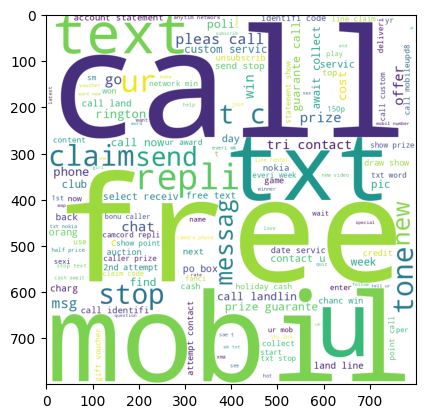

In [119]:
plt.imshow(spam_wc)

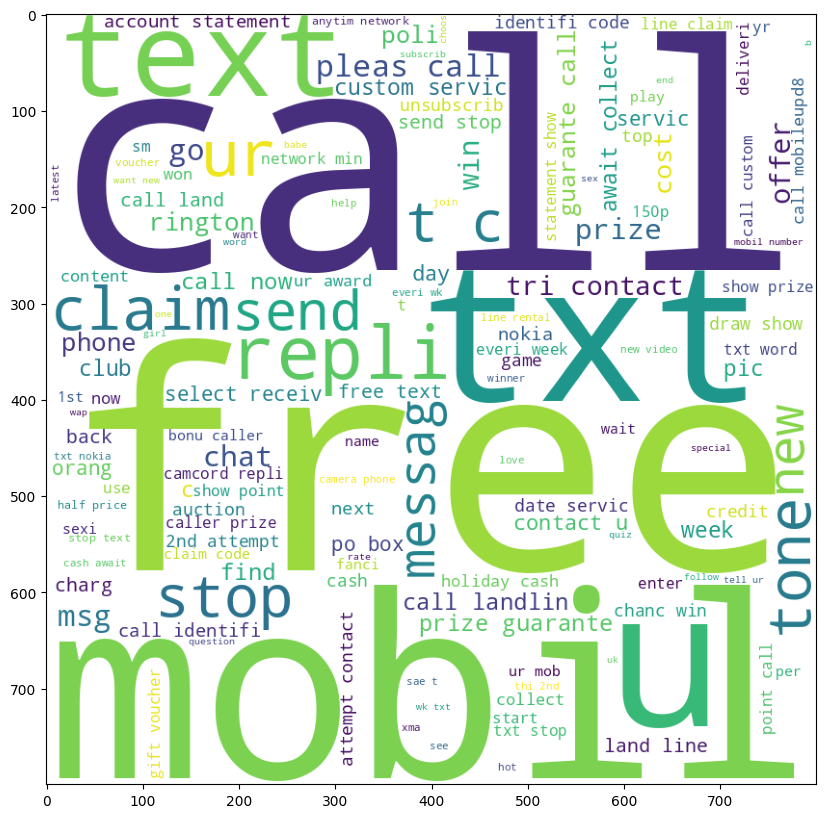

In [120]:
plt.figure(figsize=(18,10))
plt.imshow(spam_wc)

In [121]:
ham_wc=wc.generate(df[df['Target']==0]['Transformed_Text'].str.cat(sep=''))

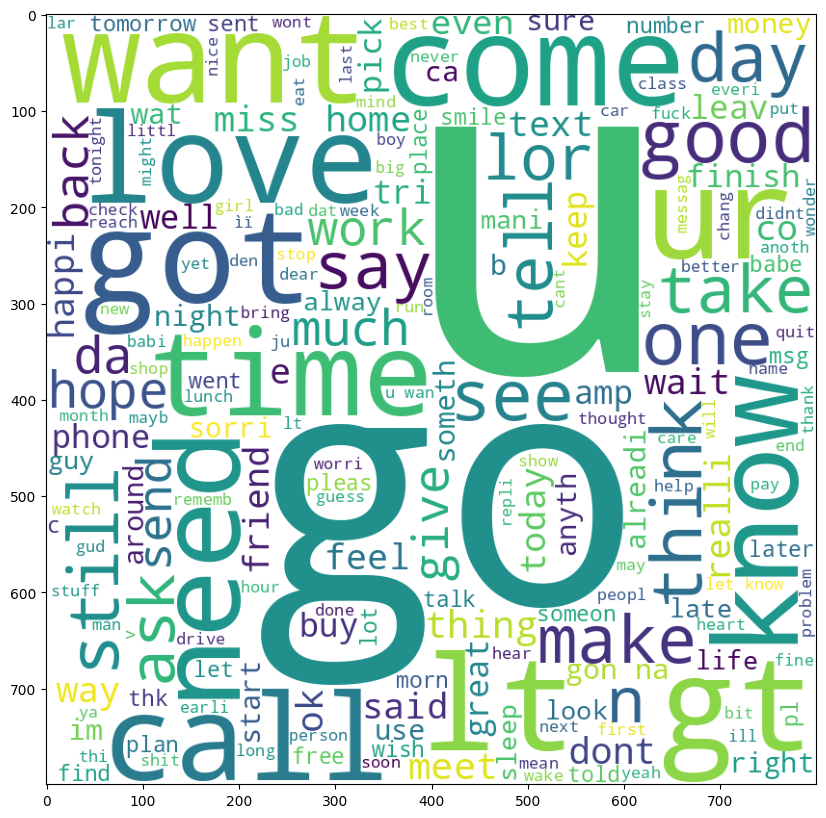

In [122]:
plt.figure(figsize=(18,10))
plt.imshow(ham_wc)

In [123]:
df.head(5)

,Target,Text,num_characters,num_words,num_sentences,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i think goe usf live around though


In [124]:
#top 30 words in spam (Target=1) for that we have to select spam msg from Transformed_Text col.

df[df['Target']==1]['Transformed_Text'] # this msgs are in series form

2       free entri 2 wkli comp win fa cup final tkt 21...
5       freemsg hey darl 3 week word back i like fun s...
8       winner as valu network custom select receivea ...
9       had mobil 11 month u r entitl updat latest col...
11      six chanc win cash from 100 pound txt csh11 se...
                              ...                        
5537    want explicit sex 30 sec ring 02073162414 cost...
5540    ask 3mobil if 0870 chatlin inclu in free min i...
5547    had contract mobil 11 mnth latest motorola nok...
5566    remind from o2 to get pound free call credit d...
5567    thi 2nd time tri 2 contact u pound prize 2 cla...
Name: Transformed_Text, Length: 653, dtype: object

In [125]:
df[df['Target']==1]['Transformed_Text'].tolist() # each msg is item, it is a list of strings #tolist() convert series into list

['free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri question std txt rate t c appli 08452810075over18',
 'freemsg hey darl 3 week word back i like fun still tb ok xxx std chg send rcv',
 'winner as valu network custom select receivea prize reward to claim call 09061701461 claim code kl341 valid 12 hour',
 'had mobil 11 month u r entitl updat latest colour mobil camera free call the mobil updat co free 08002986030',
 'six chanc win cash from 100 pound txt csh11 send 87575 cost 6day tsandc appli repli hl 4 info',
 'urgent you 1 week free membership prize jackpot txt word claim no 81010 t c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub to use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye no if repli no charg',
 '07732584351 rodger burn msg we tri call repli sm free 

In [127]:
for msg in df[df['Target']==1]['Transformed_Text'].tolist():
  print(msg)

free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri question std txt rate t c appli 08452810075over18
freemsg hey darl 3 week word back i like fun still tb ok xxx std chg send rcv
winner as valu network custom select receivea prize reward to claim call 09061701461 claim code kl341 valid 12 hour
had mobil 11 month u r entitl updat latest colour mobil camera free call the mobil updat co free 08002986030
six chanc win cash from 100 pound txt csh11 send 87575 cost 6day tsandc appli repli hl 4 info
urgent you 1 week free membership prize jackpot txt word claim no 81010 t c lccltd pobox 4403ldnw1a7rw18
xxxmobilemovieclub to use credit click wap link next txt messag click http
england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq
thank subscript rington uk mobil charg pleas confirm repli ye no if repli no charg
07732584351 rodger burn msg we tri call repli sm free nokia mobil free camcord pleas call 08

In [128]:
#splitting
for msg in df[df['Target']==1]['Transformed_Text'].tolist():
  print(msg.split())

['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', '21st', 'may', '2005', 'text', 'fa', '87121', 'receiv', 'entri', 'question', 'std', 'txt', 'rate', 't', 'c', 'appli', '08452810075over18']
['freemsg', 'hey', 'darl', '3', 'week', 'word', 'back', 'i', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chg', 'send', 'rcv']
['winner', 'as', 'valu', 'network', 'custom', 'select', 'receivea', 'prize', 'reward', 'to', 'claim', 'call', '09061701461', 'claim', 'code', 'kl341', 'valid', '12', 'hour']
['had', 'mobil', '11', 'month', 'u', 'r', 'entitl', 'updat', 'latest', 'colour', 'mobil', 'camera', 'free', 'call', 'the', 'mobil', 'updat', 'co', 'free', '08002986030']
['six', 'chanc', 'win', 'cash', 'from', '100', 'pound', 'txt', 'csh11', 'send', '87575', 'cost', '6day', 'tsandc', 'appli', 'repli', 'hl', '4', 'info']
['urgent', 'you', '1', 'week', 'free', 'membership', 'prize', 'jackpot', 'txt', 'word', 'claim', 'no', '81010', 't', 'c', 'lccltd', 'pobox', '4403ldnw1a7rw18

In [130]:
# now here after splitting each word I create spam_corpus empty list and append each splitted word in spam_corpus

spam_corpus=[]

for msg in df [df['Target']==1] ['Transformed_Text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [131]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 '2005',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 't',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'i',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'as',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'to',
 'claim',
 'call',
 '09061701461',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'had',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'the',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 'from',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 '87575',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 'you',
 '1',
 'week',
 'free',
 'membership',
 '

In [132]:
len(spam_corpus)

10847

In [133]:
from collections import Counter
Counter(spam_corpus)

Counter({'free': 191,
         'entri': 21,
         '2': 157,
         'wkli': 9,
         'comp': 8,
         'win': 48,
         'fa': 2,
         'cup': 3,
         'final': 14,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         '2005': 2,
         'text': 122,
         '87121': 2,
         'receiv': 31,
         'question': 9,
         'std': 6,
         'txt': 141,
         'rate': 26,
         't': 56,
         'c': 45,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 23,
         'week': 49,
         'word': 21,
         'back': 20,
         'i': 38,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 60,
         'rcv': 2,
         'winner': 13,
         'as': 10,
         'valu': 8,
         'network': 26,
         'custom': 42,
         'select': 26,
         'receivea': 1,
    

In [135]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 157),
 ('txt', 141),
 ('text', 122),
 ('u', 122),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('4', 99),
 ('claim', 98),
 ('you', 93),
 ('prize', 82),
 ('get', 74),
 ('your', 71),
 ('to', 70),
 ('new', 66),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('t', 56),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49)]

In [136]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,157
3,txt,141
4,text,122
5,u,122
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


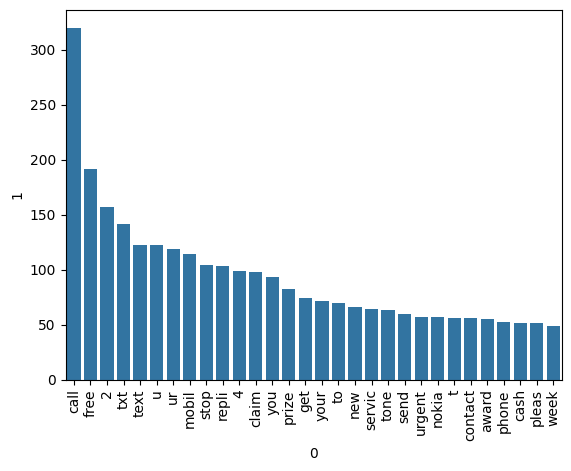

In [142]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [143]:
#Top 30 words from ham
ham_corpus=[]
for msg in df [df ['Target']==0] ['Transformed_Text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [144]:
ham_corpus

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'i',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'they',
 'treat',
 'like',
 'aid',
 'patent',
 'as',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'i',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'i',
 'cri',
 'enough',
 'today',
 'i',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'i',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'you',
 'wonder',
 'bless',
 'time',
 'i',
 'have',
 'a',
 'date',
 'on',
 'sunday',
 'with',
 'will',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb

In [145]:
len(ham_corpus)

40814

In [147]:
Counter(ham_corpus).most_common(30)

[('i', 1780),
 ('u', 892),
 ('go', 404),
 ('get', 349),
 ('2', 290),
 ('gt', 288),
 ('lt', 287),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('ok', 233),
 ('call', 233),
 ('time', 219),
 ('you', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('it', 180),
 ('how', 170),
 ('need', 170),
 ('one', 165),
 ('4', 162),
 ('lor', 159),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143)]

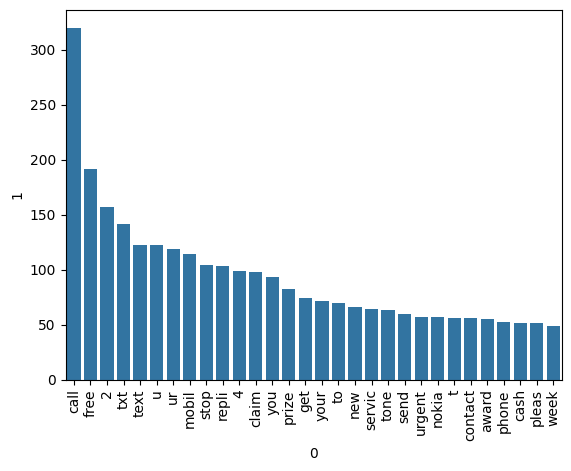

In [149]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

Model Building

In [150]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [153]:
x = cv.fit_transform(df['Transformed_Text']).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [155]:
x.shape

(5169, 6826)

In [157]:
y= df['Target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [158]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x ,y, test_size=0.2, random_state=2)

Naive Bayes

In [159]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [163]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [164]:
gnb.fit(x_train, y_train)

y_pred_gnb = gnb.predict(x_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred_gnb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gnb))
print("Precision Score:", precision_score(y_test, y_pred_gnb))

Accuracy Score: 0.8858800773694391
Confusion Matrix:
 [[798  98]
 [ 20 118]]
Precision Score: 0.5462962962962963


In [165]:
mnb.fit(x_train, y_train)

y_pred_mnb = mnb.predict(x_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred_mnb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mnb))
print("Precision Score:", precision_score(y_test, y_pred_mnb))

Accuracy Score: 0.965183752417795
Confusion Matrix:
 [[873  23]
 [ 13 125]]
Precision Score: 0.8445945945945946


In [166]:
bnb.fit(x_train, y_train)

y_pred_bnb = bnb.predict(x_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred_bnb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bnb))
print("Precision Score:", precision_score(y_test, y_pred_bnb))

Accuracy Score: 0.9709864603481625
Confusion Matrix:
 [[893   3]
 [ 27 111]]
Precision Score: 0.9736842105263158


In [167]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

X_tfidf = tfidf.fit_transform(df['Transformed_Text']).toarray()

X_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [168]:
X_tfidf.shape

(5169, 6826)

In [171]:
y_tfidf=df['Target'].values
y_tfidf

array([0, 0, 1, ..., 0, 0, 0])

In [172]:
from sklearn.model_selection import train_test_split
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf,y_tfidf, test_size=0.2, random_state=2)

In [174]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
gnb= GaussianNB()
mnb= MultinomialNB()
bnb= BernoulliNB()

In [175]:
gnb.fit(X_train_tfidf, y_train_tfidf)
y_pred_gnb_tfidf = gnb.predict(X_test_tfidf)
print(accuracy_score(y_test_tfidf, y_pred_gnb_tfidf))
print(confusion_matrix(y_test_tfidf, y_pred_gnb_tfidf))
print(precision_score(y_test_tfidf, y_pred_gnb_tfidf))

0.8800773694390716
[[798  98]
 [ 26 112]]
0.5333333333333333


In [176]:
mnb.fit(X_train_tfidf, y_train_tfidf)
y_pred_mnb_tfidf = mnb.predict(X_test_tfidf)
print(accuracy_score(y_test_tfidf, y_pred_mnb_tfidf))
print(confusion_matrix(y_test_tfidf, y_pred_mnb_tfidf))
print(precision_score(y_test_tfidf, y_pred_mnb_tfidf))

0.9564796905222437
[[896   0]
 [ 45  93]]
1.0


In [178]:
bnb.fit(X_train_tfidf, y_train_tfidf)
y_pred_bnb_tfidf = bnb.predict(X_test_tfidf)
print(accuracy_score(y_test_tfidf, y_pred_bnb_tfidf))
print(confusion_matrix(y_test_tfidf, y_pred_bnb_tfidf))
print(precision_score(y_test_tfidf, y_pred_bnb_tfidf))

0.9709864603481625
[[893   3]
 [ 27 111]]
0.9736842105263158
